# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#path

path = r'C:\Users\Lucero\Documents\Adidas US Sales'

In [4]:
#import data

df = pd.read_csv(os.path.join(path,'Adidas Prepared Data','Sales_cleaned(1).csv'), index_col = False)

# 2. Data Cleaning

In [5]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [6]:
df.shape

(9648, 13)

In [7]:
# Check for missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

C:\Users\Lucero\AppData\Local\Temp\ipykernel_4944\686187454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price per Unit'],bins = 25, kde = True)


<Axes: xlabel='Price per Unit', ylabel='Density'>

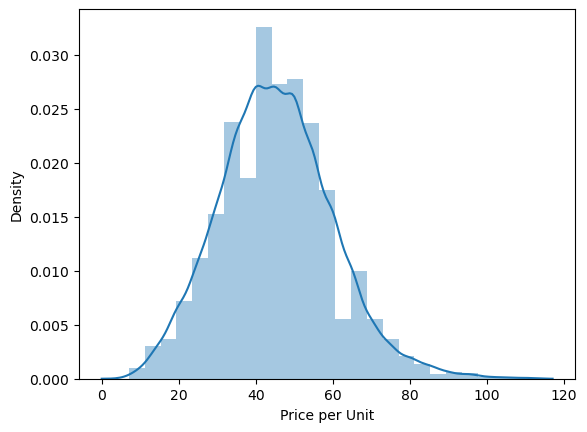

In [9]:
# Check for extreme values
sns.distplot(df['Price per Unit'],bins = 25, kde = True)

In [10]:
# Check Mean
df['Price per Unit'].mean()

45.21662520729685

In [11]:
# Check median
df['Price per Unit'].median()

45.0

In [12]:
# Check max
df['Price per Unit'].max()

110.0

In [13]:
# Check min
df['Price per Unit'].min()

7.0

In [14]:
df['Price per Unit'].max()-df['Price per Unit'].min()

103.0

In [15]:
df.describe()

,Retailer ID,Price per Unit,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,93273.437500,34425.282131,0.422991
std,2.636038e+04,14.705397,141916.016727,54193.124141,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,4254.500000,1922.000000,0.350000
50%,1.185732e+06,45.000000,9576.000000,4371.500000,0.410000
75%,1.185732e+06,55.000000,150000.000000,52063.000000,0.490000
max,1.197831e+06,110.000000,825000.000000,390000.000000,0.800000


## Data prep for regression analysis

### Hypothesis 1: If the unit price increased, people will continue to buy the products.

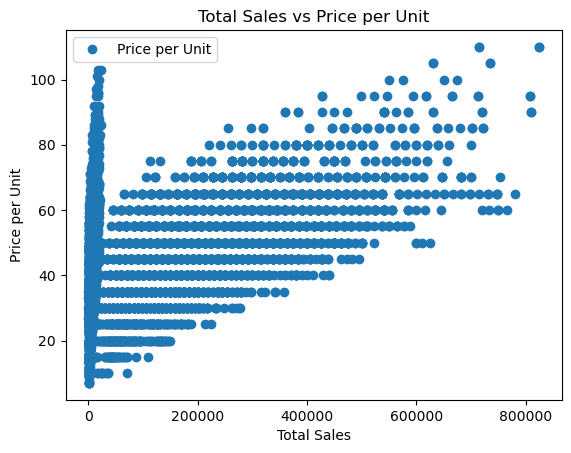

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total Sales', y='Price per Unit',style='o') 
plt.title('Total Sales vs Price per Unit')  
plt.xlabel('Total Sales')  
plt.ylabel('Price per Unit')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Total Sales'].values.reshape(-1,1)
y = df['Price per Unit'].values.reshape(-1,1)

In [23]:
X

array([[600000.],
       [500000.],
       [400000.],
       ...,
       [  7544.],
       [  2940.],
       [  2407.]])

In [24]:
y

array([[50.],
       [50.],
       [40.],
       ...,
       [41.],
       [42.],
       [29.]])

In [25]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 3.  Regression Analysis

In [26]:
# Create regression object
regression = LinearRegression()

In [27]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

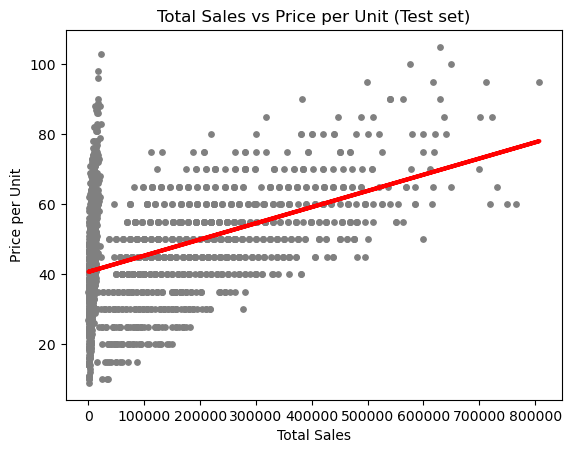

In [29]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Sales vs Price per Unit (Test set)')
plot_test.xlabel('Total Sales')
plot_test.ylabel('Price per Unit')
plot_test.show()

In [30]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.62419284e-05]]
Mean squared error:  177.34313342256831
R2 score:  0.1628671067810058


In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,34.0,40.948811
1,51.0,41.115467
2,50.0,40.927910
3,19.0,40.767774
4,38.0,40.998845
5,34.0,41.109178
6,37.0,40.855356
7,39.0,41.348110
8,20.0,40.922361
9,35.0,47.626053


#### According to the slope in this graph, it confirms that the coefficient and relationship of the variables is positive, since it indicates that if X goes up, so does my variable Y. Also, we can see that R2 came out 0.16 which tells me that it is not a good fit.

#### Compare how the regression fits the training set

In [33]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.62419284e-05]]
Mean squared error:  174.29007116051426
R2 score:  0.20070567366365322


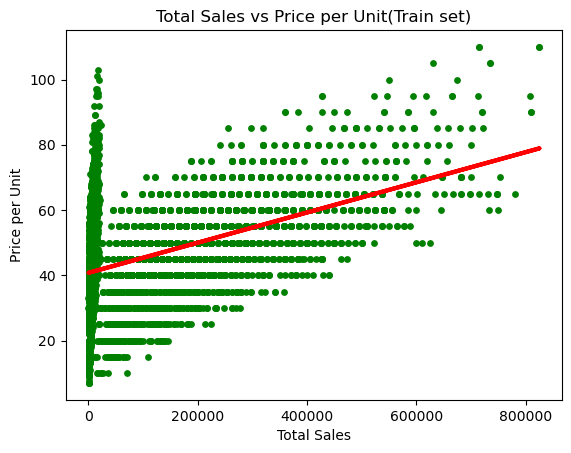

In [36]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Sales vs Price per Unit(Train set)')
plot_test.xlabel('Total Sales')
plot_test.ylabel('Price per Unit')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set. The most significant thing that I can highlight is that the R2 has persisted, but it is still lower, indicating that there is not a good fit.

### Hypothesis 2: If it presents a higher operating profit, it is due to the greater amount of Total Sales made

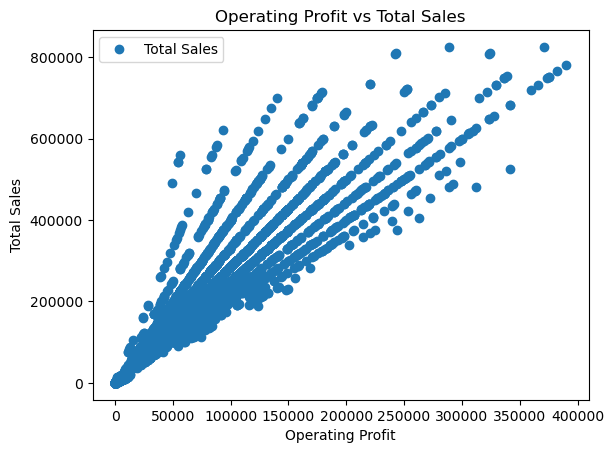

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Operating Profit', y='Total Sales',style='o') 
plt.title('Operating Profit vs Total Sales')  
plt.xlabel('Operating Profit')  
plt.ylabel('Total Sales')  
plt.show()

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Operating Profit'].values.reshape(-1,1)
y = df['Total Sales'].values.reshape(-1,1)

In [44]:
X

array([[300000.],
       [150000.],
       [140000.],
       ...,
       [  2791.],
       [  1235.],
       [   650.]])

In [41]:
y

array([[600000.],
       [500000.],
       [400000.],
       ...,
       [  7544.],
       [  2940.],
       [  2407.]])

In [45]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

#### Regression Analysis

In [46]:
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
y_predicted = regression.predict(X_test)

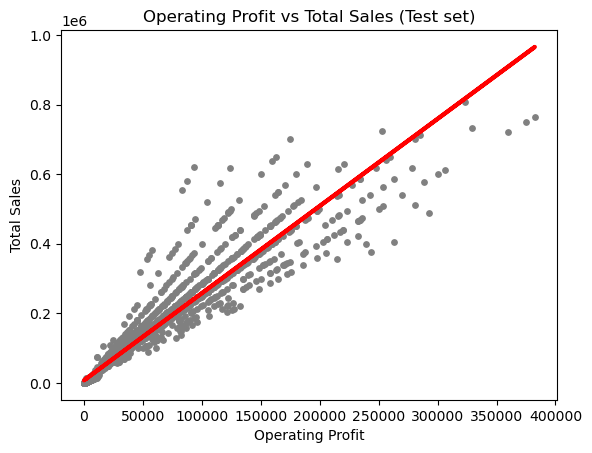

In [54]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Operating Profit vs Total Sales (Test set)')
plot_test.xlabel('Operating Profit')
plot_test.ylabel('Total Sales')
plot_test.show()

In [48]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [49]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50493019]]
Mean squared error:  1546183378.6775708
R2 score:  0.9201621713735924


In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,34.0,40.948811
1,51.0,41.115467
2,50.0,40.927910
3,19.0,40.767774
4,38.0,40.998845
5,34.0,41.109178
6,37.0,40.855356
7,39.0,41.348110
8,20.0,40.922361
9,35.0,47.626053


#### In this case the slope of the coefficient is positive, which is a good indication. Also the R2 is 0.92 which is closer to 1, indicating that it is a good fit!

#### Compare how the regression fits the training set

In [51]:
# Predict on the training set

y_predicted_train1 = regression.predict(X_train) # This is predicting X_train!

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train1)
r2 = r2_score(y_train, y_predicted_train1)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50493019]]
Mean squared error:  1796553450.7975018
R2 score:  0.9122218446438342


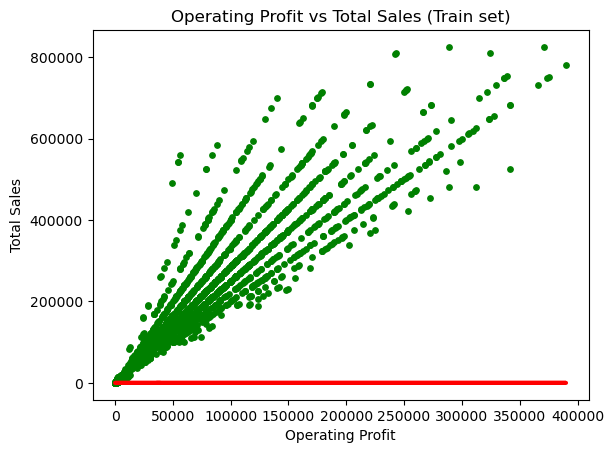

In [55]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Operating Profit vs Total Sales (Train set)')
plot_test.xlabel('Operating Profit')
plot_test.ylabel('Total Sales')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set.  I did this to be able to compare the results and how much variation they had but according to the results there is not much variation. However, in this case the regression line does not cover most of the points on the graph.